1) Below is a state graph for a vacuum world with 3 squares.  Create a dictionary that acts like this graph - looking up a state as key gives the list of neighbors for that state.  The states are named for you ('A_dirty' etc).  If there are multiple edges to a state, include the state multiple times in the list; every node should have 3 neighbors corresponding to the 3 actions.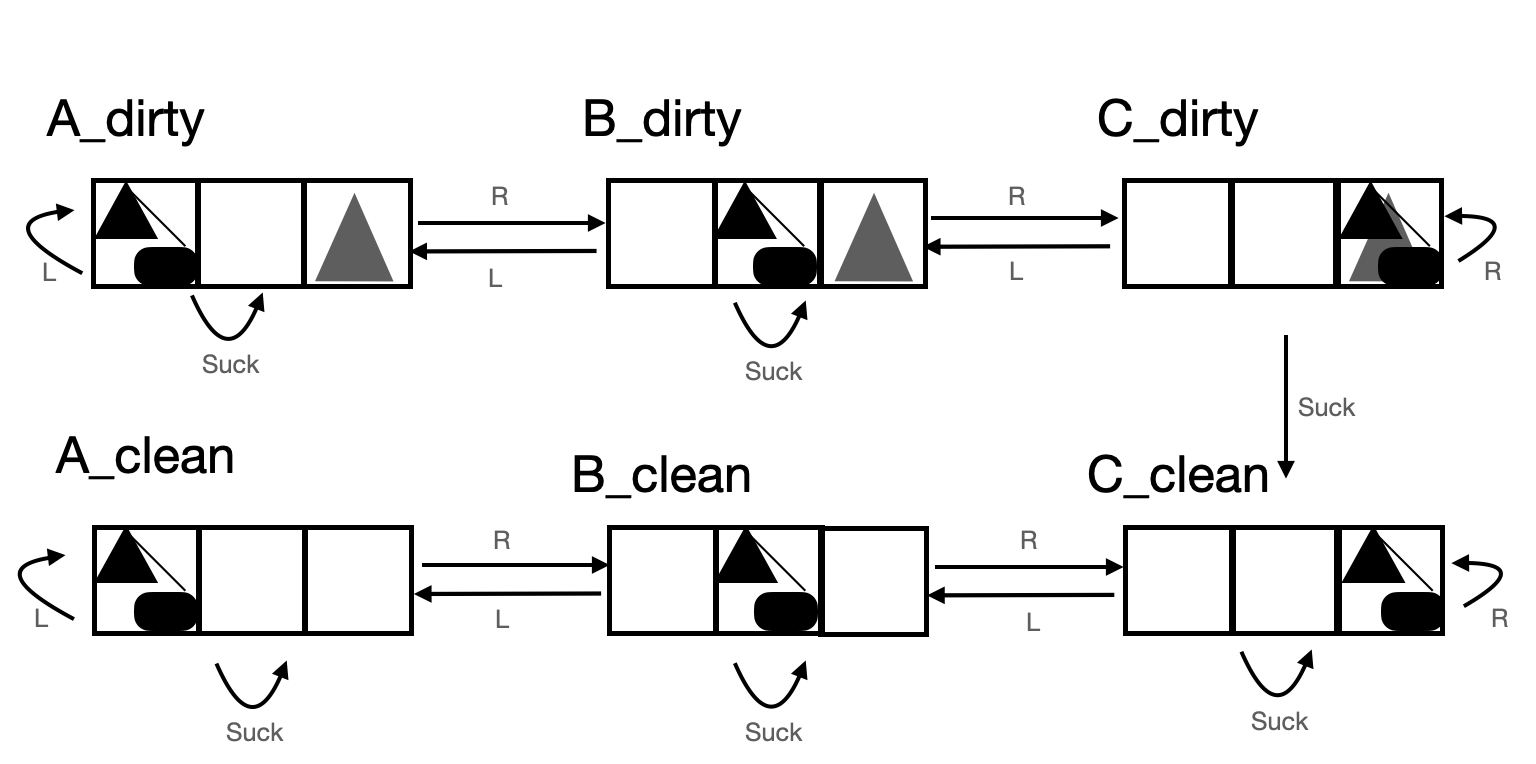

In [1]:
# TODO

states = {
    'A_dirty': ['A_dirty', 'B_dirty'],
    'B_dirty': ['A_dirty', 'B_dirty', 'C_dirty'],
    'C_dirty': ['B_dirty', 'C_clean'],
    'A_clean': ['A_clean', 'B_clean'],
    'B_clean': ['A_clean', 'B_clean', 'C_clean'],
    'C_clean': ['B_clean', 'C_clean']
}

2)  If the dirt could exist not just in the rightmost square, but could be present or absent in any combination of squares, how many states would there be?

**TODO**

If dirt could be present or absent in any combination of squares, the number of possible states would be 2 (number of possible states in each location - clean or dirty) * 3 (the number of different squares) * 3 (the number of squares the robot could be in).

3) Complete the following breadth-first search function that takes a starting state, a graph, and a goal state, and returns the sequence of states needed to get from the start state to the goal state in the smallest number of moves.  Some pseudocode is provided to help you, but you don't need to construct the tree T.

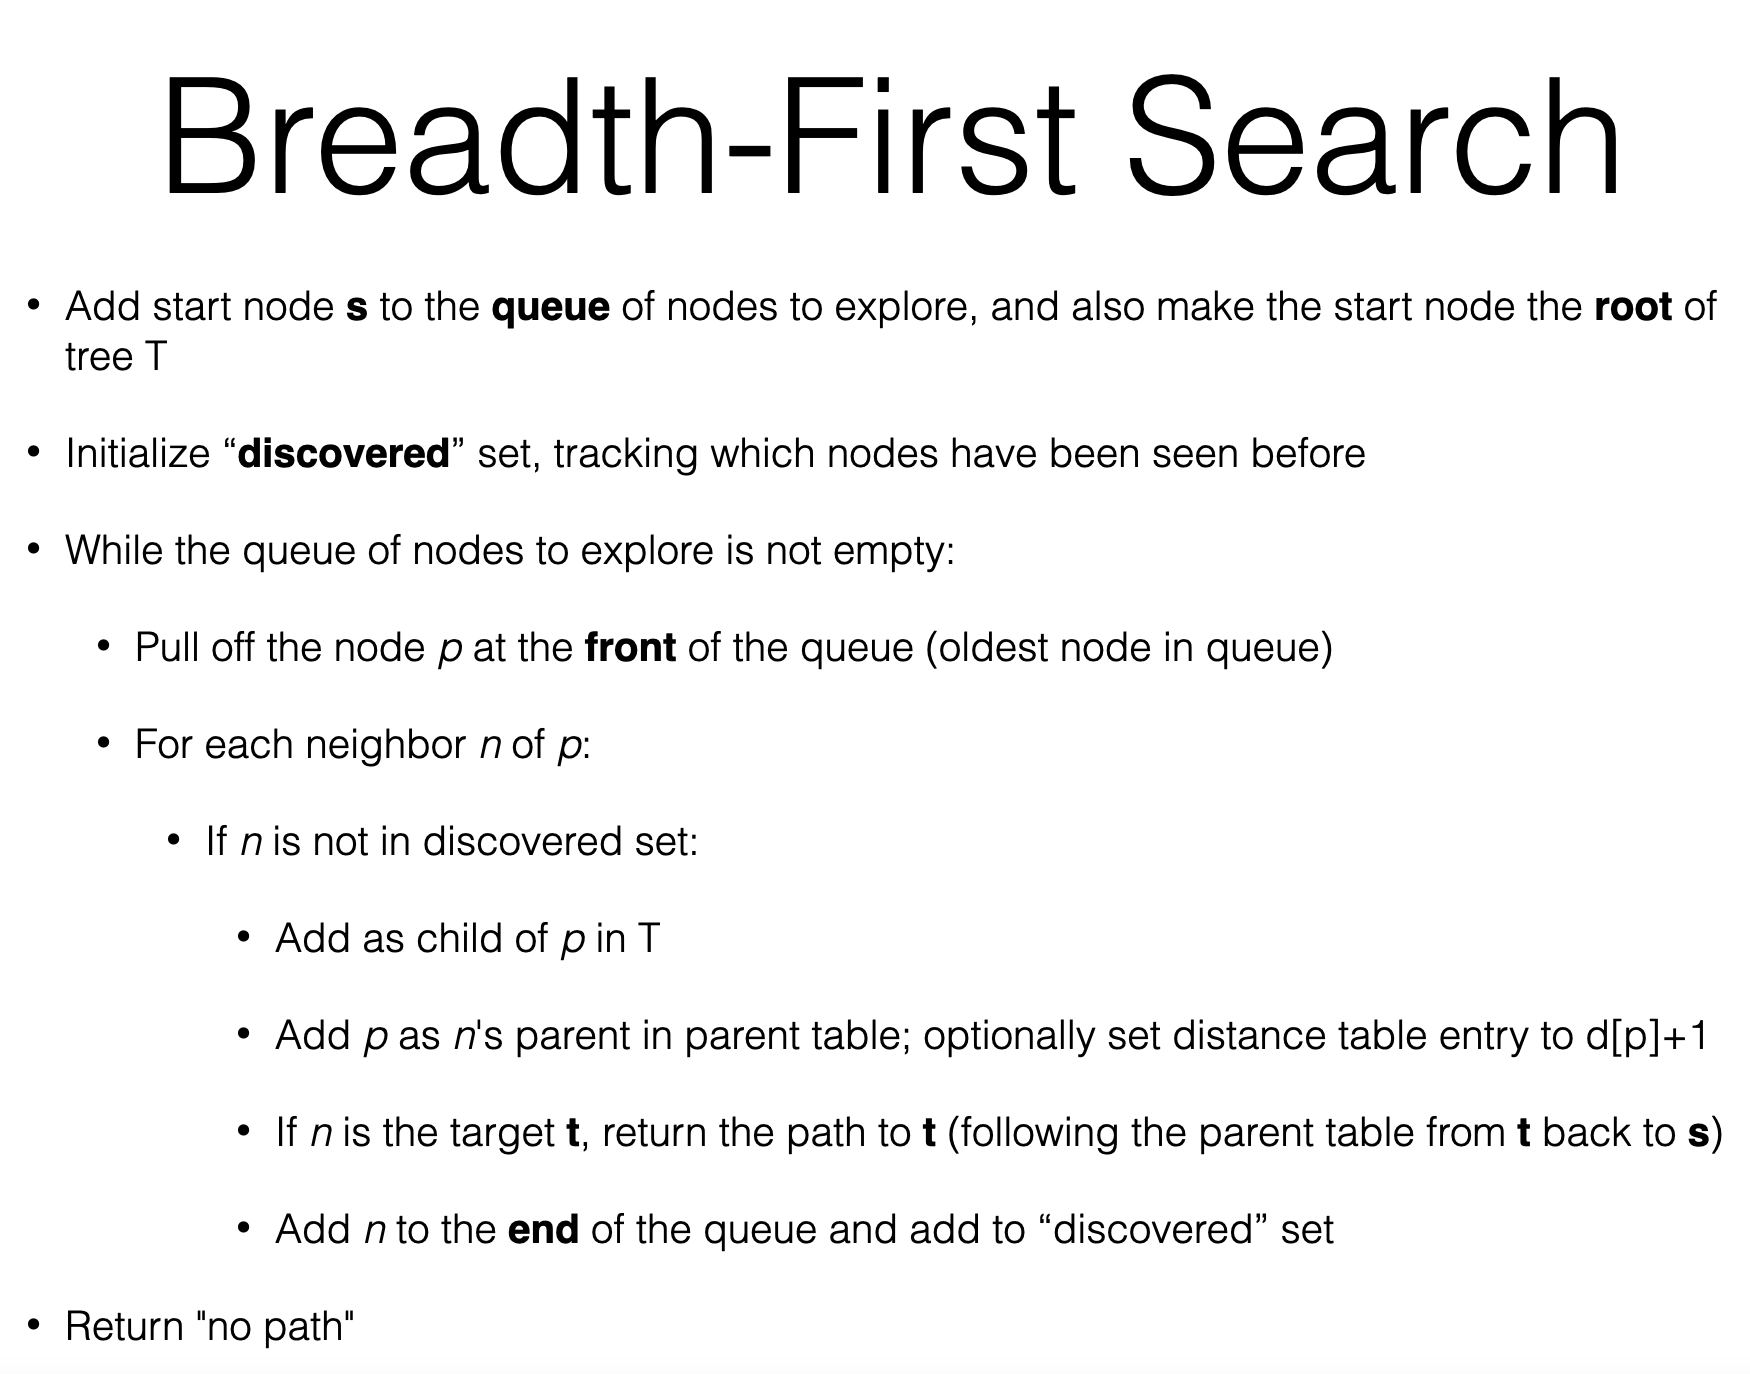

In [24]:
from collections import deque

def bfs(start, graph, goal):
  q = deque([start])
  discovered = {start}
  parents = {start:  None}
  while q:
    first = q.pop()
    # TODO:  Use the graph to get the neighbors.
    for nextState in graph[first]:
      # TODO:  For each neighbor, if it hasn't been discovered yet,
      #   update the parents dictionary
      #   add the neighbor to the discovered dictionary
      #   if it's the goal, return a path to the goal
      #   add the neighbor to the "end of the line"
      print("visiting " + nextState)
      if(not nextState in discovered):
        q.append(nextState)
        discovered.add(nextState)
        parents[nextState] = first
        if(nextState == goal):
          return pathTo(parents, goal)
  print("discovered: " + str(discovered))
  return None

# Helper:  given the goal state, use the parents table to look up the path
# to get there
def pathTo(parents,goal):
  path = []
  node = goal
  while node in parents:
    path.insert(0, node)
    node = parents[node]
  return path

In [25]:
print(bfs('B_dirty', states, 'B_clean'))

visiting A_dirty
visiting B_dirty
visiting C_dirty
visiting B_dirty
visiting C_clean
visiting B_clean
['B_dirty', 'C_dirty', 'C_clean', 'B_clean']


4) Perform A* by hand on the following graph, given the cost-to-go heuristic values h() and the pictured real edge weights.  List the contents of the priority queue at each point in the algorithm.

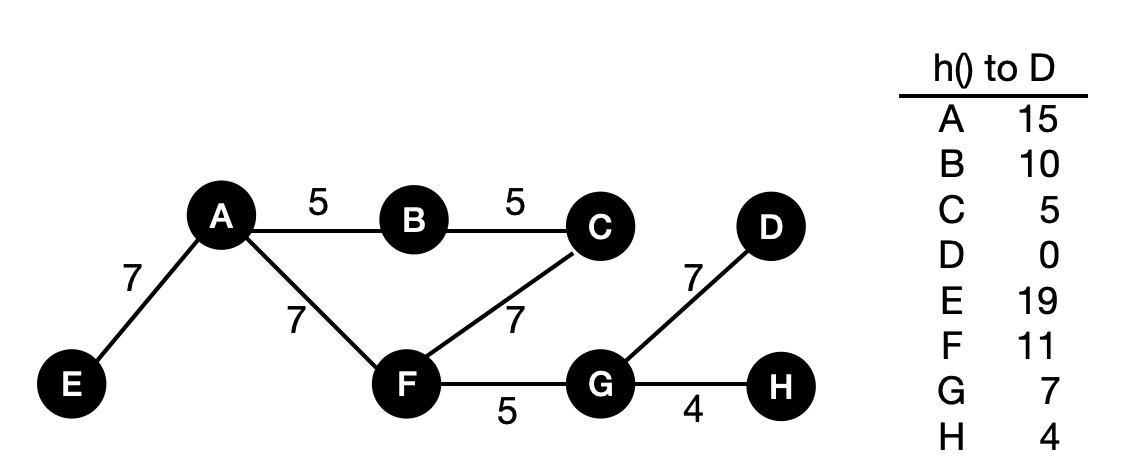

**TODO**

step 1: 
B:10 + 5 = 15
F:7 + 11 = 18
E:7 + 19 = 26

step 2:
C:5 (cost to get to B) + 5 + 5 = 15
F:7 + 11 = 18
E:7 + 19 = 26

step 3:
F:7 + 11 = 18
E:7 + 19 = 26

step 4: 
G: 7 (cost to get to F) + 5 + 7 = 19
E: 7 + 19 = 26

step 5:
D: 12 (cost to arrive at G) + 7 + 0 = 19
H: 12 (cost to arrive at G) + 4 + 4 = 20
E: 7 + 19 = 26


5) One possible heuristic on a graph for A* would be the number of edges in the path found by BFS from the node to the goal.  Under what circumstances would this heuristic be admissible?

**TODO**

This heuristic would be admissible if the cost to travel each edge is at least 1. This must be true otherwise the heuristic would be overestimating the cost to arrive at its goal if it counts up the number of edges in the path from the node to the goal.